In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def conv_sp(bits, p):
    '''
    converte sério-paraleleo, agrupando de p em p
    '''
    return np.reshape(bits, (int(len(bits)/p), p))


def get_key(val): 
    '''
    retorna o numero da sequencia conforme tabela
    '''
    for key, value in symbol_table.items(): 
         if np.array_equal(val,value): 
            return key
    raise KeyError("key não existe:", str(val))
    
    
def toIQ(i, E, M):
     return (np.sqrt(E)*np.cos(2*(i-1)*(np.pi/M)), 
             np.sqrt(E)*np.sin(2*(i-1)*(np.pi/M)))
    
def freq_shift(s, fc, t):
    '''
    adiciona defasamento no sinal, se acordo com sua posição na constelação
    '''
    r1 = s[0]*np.sqrt(2/t[-1])*np.cos(2*np.pi*fc*t)
    r2 = s[1]*np.sqrt(2/t[-1])*np.sin(2*np.pi*fc*t)
    return r1+r2

def viz_modulation(t, signal, T_s, name:str):
    #Visualização do sinal no tempo e na frequência
    plt.figure(num=1,figsize=(20,7))
    plt.plot(t, signal)
    plt.title(f"Modulação {name}")
    plt.ylabel("Amplitude (V)")
    plt.xlabel("time (s)")

    S = np.fft.fft(signal)
    n = np.fft.fftfreq(S.size, d=t[1])
    plt.figure(num=2)
    plt.plot(n[0:int(n.size/32)], abs(S[0:int(S.size/32)]))
    plt.ylabel("|S(w)|")
    plt.xlabel("frequency (Hz)")

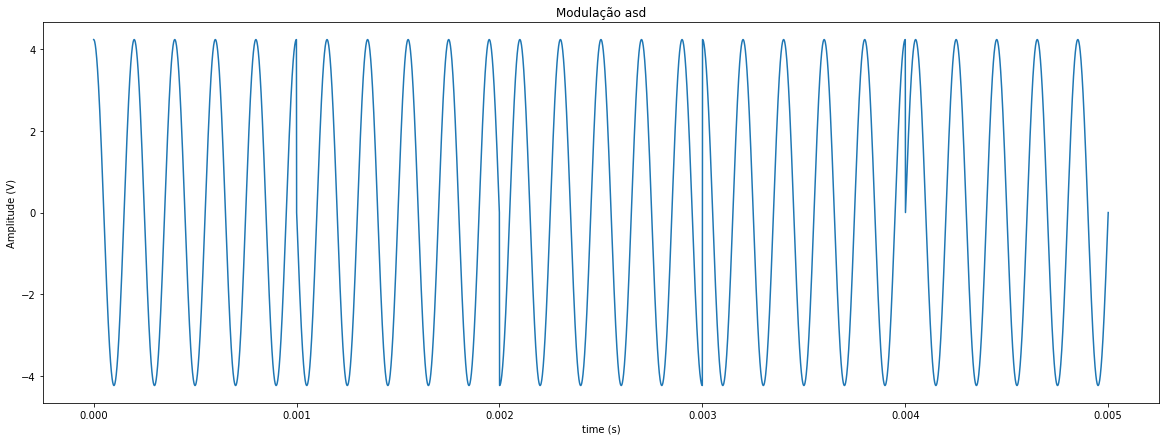

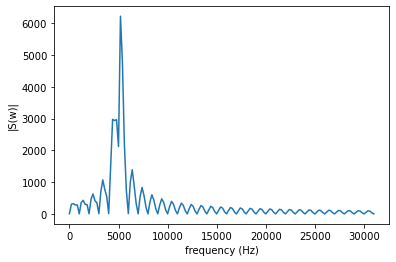

In [3]:
symbol_table = {
    1: [1,1], 
    2: [0,1], 
    3: [0,0],
    4: [1,0],
}



E = 0.009  #energia do sinal  W.s
M = 4  #variações de fase
fc = 5e3   #freq da portadora em Hz
T_s = 1e-3  #intervalo de bit em s

s = [1,1,1,0,0,0,1,1,0,1] #np.random.randint(2, size=12)

# Bits to symbols
s_groups = conv_sp(s, int(np.log2(len(symbol_table))))
s_symbols = [get_key(bit_group) for bit_group in s_groups]

# Symbols to IQ
s_IQ = [toIQ(symbol, E, M) for symbol in s_symbols]

# IQ to signal
ts = np.linspace(0, T_s, 1000)
s_shifted = np.array([freq_shift(IQ, fc, ts) for IQ in s_IQ]).flatten()

t = np.linspace(0, T_s*s_groups.shape[0], np.array(s_shifted).size)
viz_modulation(t, s_shifted, T_s, '4-PSK')

# Demodulação - Não funciona

In [5]:
from scipy.integrate import simps


In [25]:
num_amostras_por_bit = 1000
s_modulated = qpsk
for x in range(0, s_modulated.shape[0], num_amostras_por_bit):
    #corr phi1
    f = lambda t: np.sqrt(2/T_s)*np.cos((2*np.pi/T_s)*t)
    X = simps(s_modulated[x:x+num_amostras_por_bit]*f(t[x:x+num_amostras_por_bit]), t[x:x+num_amostras_por_bit])
    if X>0: 
        X=1
    else: 
        X=0
    #corr phi2
    f = lambda t: np.sqrt(2/T_s)*np.sin((2*np.pi/T_s)*t)
    Y = simps(s_modulated[x:x+num_amostras_por_bit]*f(t[x:x+num_amostras_por_bit]), t[x:x+num_amostras_por_bit])
    if Y>0: 
        Y=1
    else: 
        Y=0
    print(X,Y)

1 0
0 0
0 0
1 1
0 1


In [14]:
conv

array([[1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 1]])